In [278]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/data/run_data.csv")

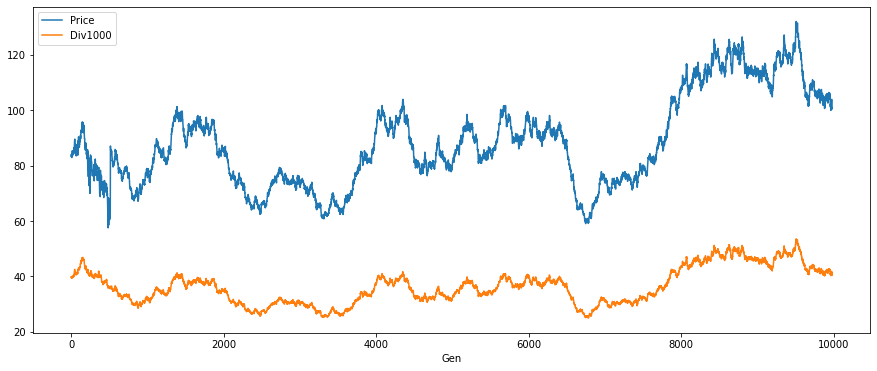

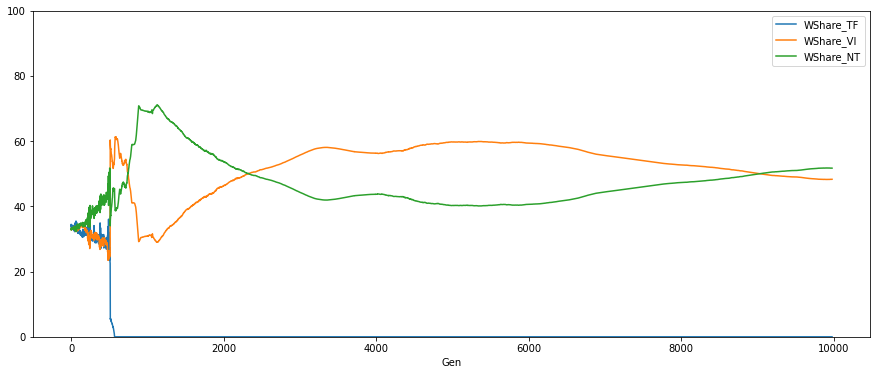

In [279]:
# df.plot(x="Gen", y = ["Price"],
#         kind="line", figsize=(15, 6))
# plt.show()

df['Div1000'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Div1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
0.20899167151037396 0.3050399817949532 -0.7660304602501191
Annual mean returns  
[0.1901814076619742, 0.20453208223038763, -0.22607272655221217]
Annual std returns
[0.9099951509432946, 0.6705090953220466, 0.29512237212916625]
T test for Rf = 0, VI vs TF
T test value VI-TF is 31.55199426085049
T test value VI-NT is 2.4709378383005682
T test value TF-NT is -35.90796770365846
confidence intervals at 95%
[0.1891579712327245, 0.22882537178802342]
[0.28496813651932396, 0.3251118270705824]
[-0.7883445518814276, -0.7437163686188106]
Including r = 0.01 as risk free rate
[19.66469547792094, 28.81042357476921, -68.16408784286432]


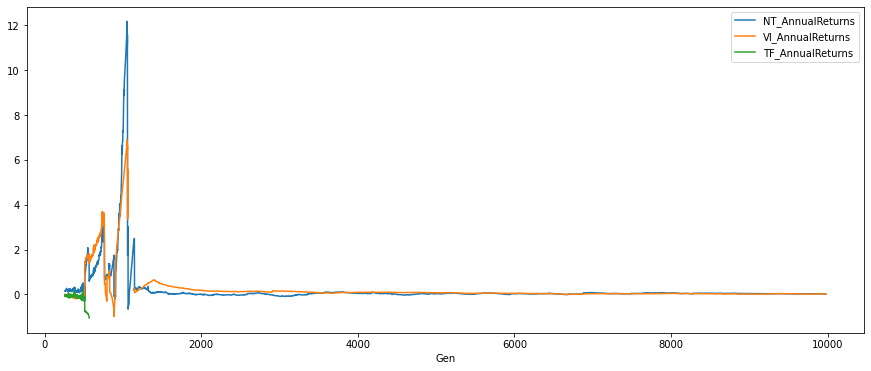

In [280]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])

print('T test for Rf = 0, VI vs TF')
df['DiffAR_VI_TF'] = df['VI_AnnualReturns'] - df['TF_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['TF_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_TF'])
obs = len(df['DiffAR_VI_TF'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-TF is ' + str(t))

df['DiffAR_VI_NT'] = df['VI_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_NT'])
obs = len(df['DiffAR_VI_NT'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-NT is ' + str(t))

df['DiffAR_TF_NT'] = df['TF_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['TF_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_TF_NT'])
obs = len(df['DiffAR_TF_NT'])
t = (srNT -srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value TF-NT is ' + str(t))


print('confidence intervals at 95%')
T = len(df['VI_AnnualReturns'])

CI_Sharpe_NT = [SharpeNT - 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T),SharpeNT + 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T)]
print(CI_Sharpe_NT)
CI_Sharpe_VI = [SharpeVI - 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T),SharpeVI + 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T)]
print(CI_Sharpe_VI)
CI_Sharpe_TF = [SharpeTF - 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T),SharpeTF + 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T)]
print(CI_Sharpe_TF)

print('Including r = 0.01 as risk free rate')

TValueNT = (SharpeNT - 0.01) / np.sqrt((1 + 0.5 * SharpeNT**2)/T)
TValueVI = (SharpeVI - 0.01) / np.sqrt((1 + 0.5 * SharpeVI**2)/T)
TValueTF = (SharpeTF - 0.01) / np.sqrt((1 + 0.5 * SharpeTF**2)/T)
print([TValueNT,TValueVI,TValueTF])


df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()

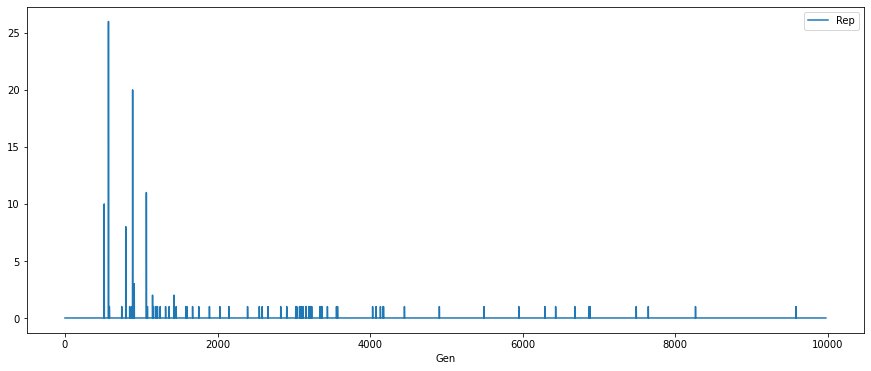

In [281]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

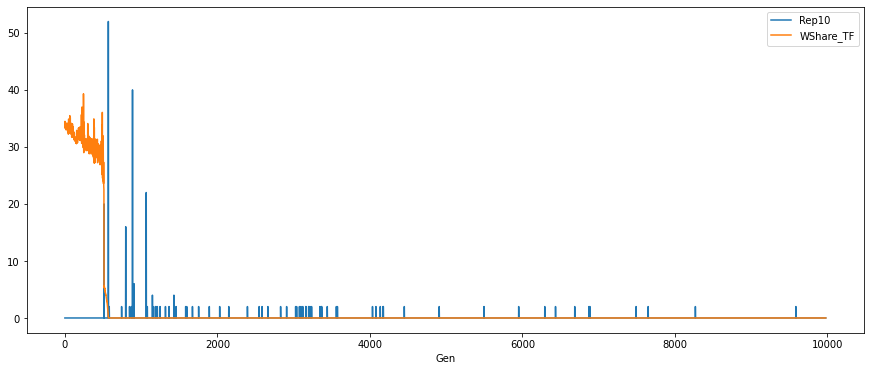

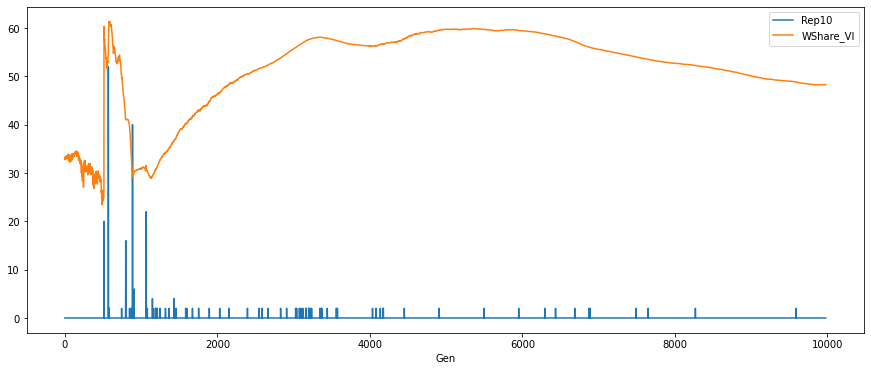

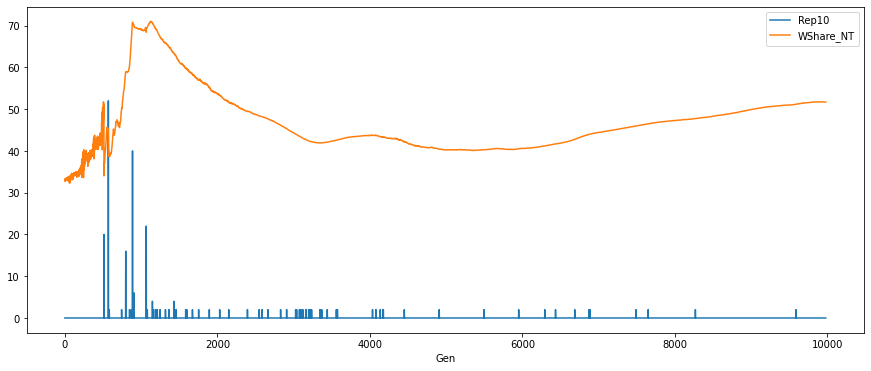

In [282]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [283]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

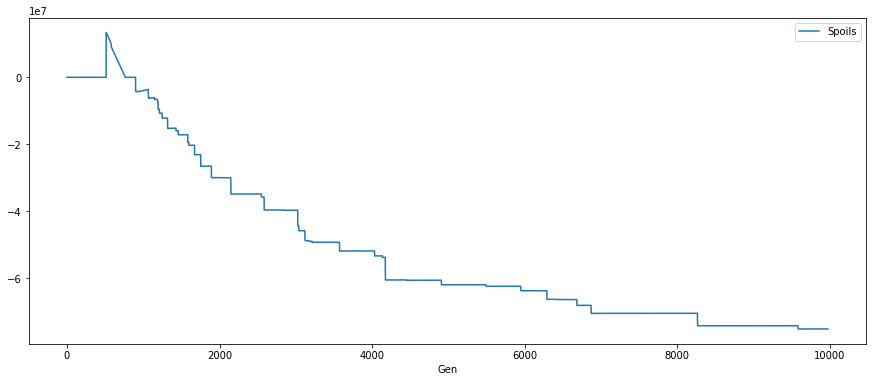

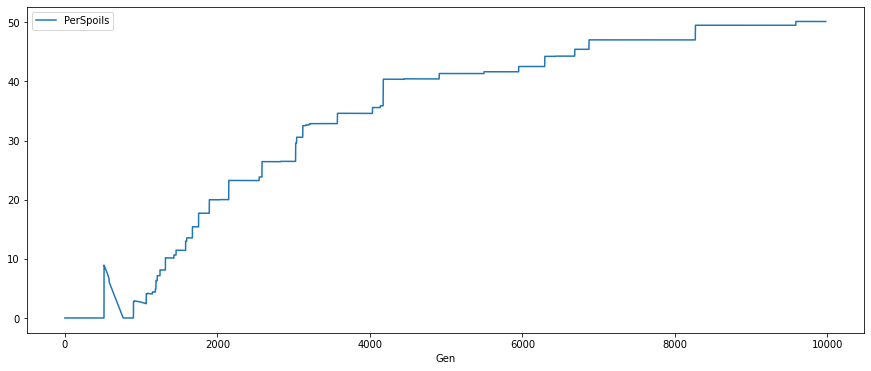

In [284]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

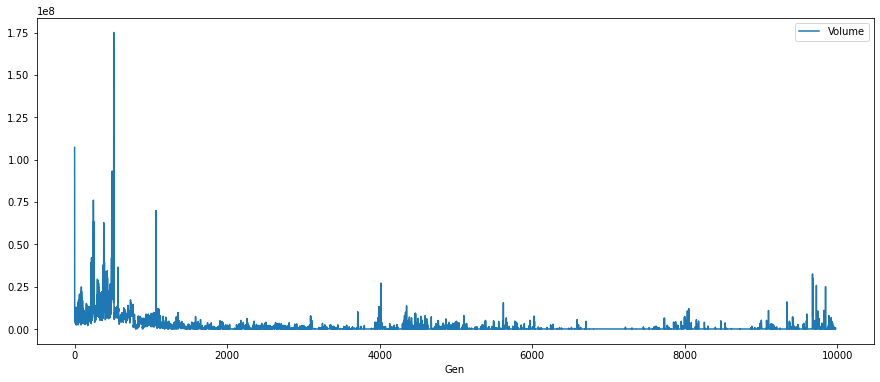

In [285]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

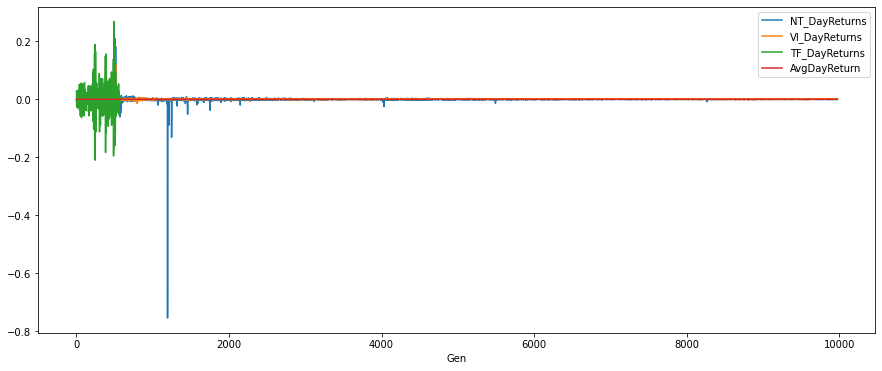

In [286]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

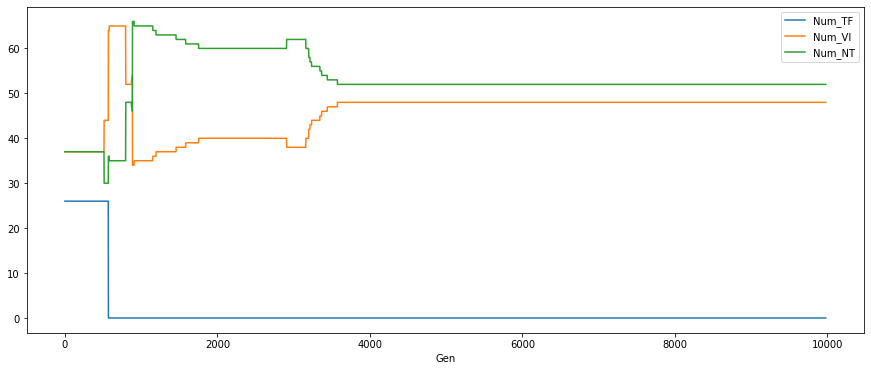

In [287]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


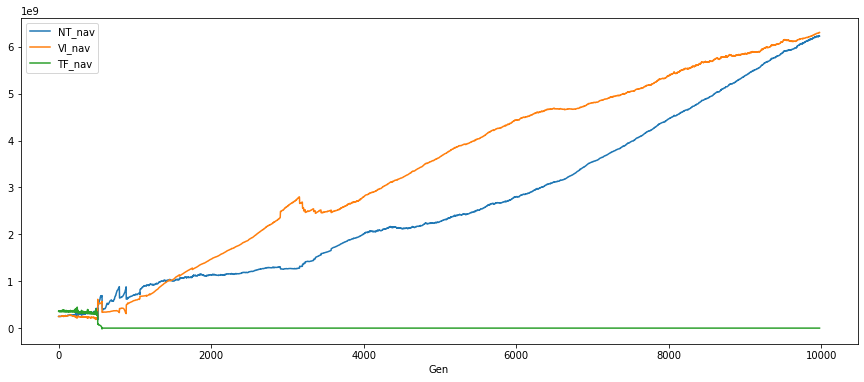

In [288]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


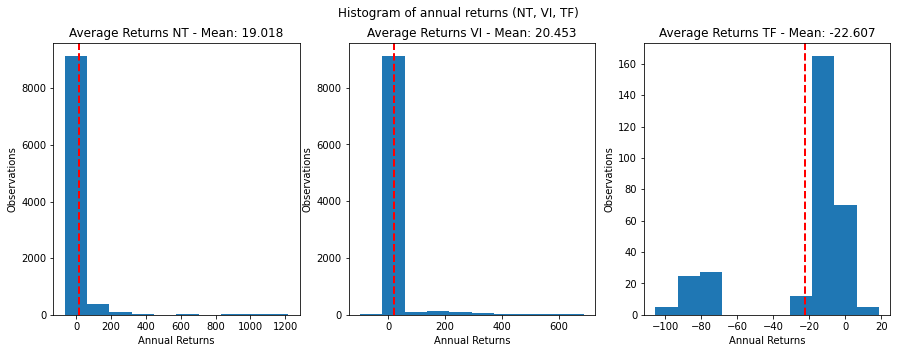

In [289]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [290]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.16053914794522683


In [291]:
''' Significance test '''

data = pd.DataFrame()
data['NT'] = df['NT_AnnualReturns'].iloc[-252*2:]
data['VI'] = df['VI_AnnualReturns'].iloc[-252*2:]
data['TF'] = df['TF_AnnualReturns'].iloc[-252*2:]

def Sharpe(arr):
    sharpe = np.nanmean(arr) / np.nanstd(arr)
    se = np.sqrt((1 + 0.5 * sharpe ** 2)/len(arr))
    result = [sharpe, se]
    return result

print('Full data Sharpe ')
print([Sharpe(df['NT_AnnualReturns']),Sharpe(df['VI_AnnualReturns']),Sharpe(df['TF_AnnualReturns'])])

print('Last 2Y Sharpe')
print(len(data['NT']))
print([Sharpe(data['NT']),Sharpe(data['VI']),Sharpe(data['TF'])])

data = pd.DataFrame()
data['NT2'] = df['NT_AnnualReturns'].iloc[-20:]
data['VI2'] = df['VI_AnnualReturns'].iloc[-20:]
data['TF2'] = df['TF_AnnualReturns'].iloc[-20:]

print('Last 20 days Sharpe')
print(len(data['NT2']))
print([Sharpe(data['NT2']),Sharpe(data['VI2']),Sharpe(data['TF2'])])

data = pd.DataFrame()
data['NT2'] = df['NT_AnnualReturns'].iloc[-252*20:]
data['VI2'] = df['VI_AnnualReturns'].iloc[-252*20:]
data['TF2'] = df['TF_AnnualReturns'].iloc[-252*20:]

print('Last 20Y Sharpe')
print(len(data['NT2']))
print([Sharpe(data['NT2']),Sharpe(data['VI2']),Sharpe(data['TF2'])])



Full data Sharpe 
[[0.20899167151037396, 0.010119234835535446], [0.3050399817949532, 0.010240737385525115], [-0.7660304602501191, 0.011384740628218601]]
Last 2Y Sharpe
504
[[5.8038157769278635, 0.18815171809035905], [2.6031092887314258, 0.09330876573492985], [nan, nan]]
Last 20 days Sharpe
20
[[12.212501056705017, 1.9438697362479125], [55.83471635702923, 8.831075176146316], [nan, nan]]
Last 20Y Sharpe
5040
[[2.008268140244773, 0.024464788681498494], [1.8006104297729444, 0.022804809085830588], [nan, nan]]


/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_29056/4048983765.py:9: RuntimeWarning: Mean of empty slice
  sharpe = np.nanmean(arr) / np.nanstd(arr)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [292]:
popsize = 5
import numpy as np
from scipy.special import stdtrit

generation = 100
returns_tracker = np.random.rand(generation,popsize)
# print(returns_tracker)

ReinvestmentRate = 1.2
returns_tracker[:,1] = -1 * returns_tracker[:,1]
# print(returns_tracker)
InvestmentHorizon = 5


def Investment(returns_tracker, InvestmentHorizon, generation):
    ReturnData = returns_tracker[generation-InvestmentHorizon:generation,:]
    InvestmentRatios = [np.nan] * popsize
    # print(ReturnData)
    # It correctly takes the last 5 points
    SharpeList = [0] * popsize

    TestThreshold = stdtrit(InvestmentHorizon, 0.95)
    TestValues1 = [0] * popsize

    for i in range(popsize):
        DataSlice = ReturnData[:,i]
        MeanReturns = np.nanmean(DataSlice)
        StdReturns = np.nanstd(DataSlice)
        if StdReturns != 0:
            Sharpe = MeanReturns / StdReturns
        else:
            Sharpe = np.nan

        SESharpe = np.sqrt(1 + 0.5 * Sharpe ** 2) / np.sqrt(InvestmentHorizon)
        SharpeList[i] = Sharpe
        DailyInterestRate = 0.01 / 252
        TValue = (Sharpe - DailyInterestRate) / SESharpe
        TestValues1[i] = TValue

        # Replacement by a continuous mechanism
    SumTValues = sum(TestValues1)
    countSignif = 0
    for i in range(popsize):
        InvestmentRatios[i] = TestValues1[i] / SumTValues
        if TestValues1[i] > TestThreshold:
            countSignif += 1

    return countSignif, InvestmentRatios

countSignif, InvestmentRatios = Investment(returns_tracker, 3, generation)
print([countSignif, InvestmentRatios])

countSignif, InvestmentRatios = Investment(returns_tracker, 5, generation)
print([countSignif, InvestmentRatios])

countSignif, InvestmentRatios = Investment(returns_tracker, 50, generation)
print([countSignif, InvestmentRatios])

[0, [0.3122843903649092, -0.42587312047497344, 0.40695580703639317, 0.3726970456834769, 0.33393587739019426]]
[4, [0.3504786026610733, -0.3762345018567599, 0.31680975687537344, 0.3465006279243719, 0.3624455143959411]]
[4, [0.3438753351155648, -0.3243256273342323, 0.3177544776567231, 0.32648421450313553, 0.3362116000588089]]
